In [ ]:
#Dillon Ouimet, 801045569, Homework 1

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# We want to call the CSV data.
data = pd.read_csv('https://raw.githubusercontent.com/DillonOuimet/ECGR_4105/main/Homework_1/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [88]:
m = len(data)
m

545

In [89]:
data.shape

(545, 13)

In [90]:
# You can see that your dataset has many columns with values as 'Yes' or 'No'.
# But in order to fit a regression line, we would need numerical values and not string.
# List of variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
# Defining the map function
def binary_map(x):
        return x.map({'yes': 1, "no": 0})
           
# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)
# Check the housing dataframe now
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [91]:
#Problem 1a

In [92]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respec
np.random.seed(0)
#70, 30 split.
data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state=42)
data_train.shape
mTrain = len(data_train)
data_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
126,5880000,7160,3,1,1,1,0,1,0,0,2,1,unfurnished
363,3710000,3584,2,1,1,1,0,0,1,0,0,0,semi-furnished
370,3640000,4280,2,1,1,1,0,0,0,1,2,0,semi-furnished
31,8400000,7000,3,1,4,1,0,0,0,1,2,0,semi-furnished
113,6083000,9620,3,1,1,1,0,1,0,0,2,1,furnished


In [93]:
data_test.shape
mTest = len(data_test)

In [94]:
#for Question a we only want to look at these variables. 
Qa_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
data_Newtrain = data_train[Qa_vars]
data_Newtest = data_test[Qa_vars]
data_Newtest.head()

,area,bedrooms,bathrooms,stories,parking
316,5900,4,2,2,1
77,6500,3,2,3,0
360,4040,2,1,1,0
90,5000,3,1,2,0
493,3960,3,1,1,0


In [95]:
#define the expl. variable values train

X_0_train = np.ones((mTrain, 1)) 
X_1_train = data_Newtrain.values[:, 0].reshape((mTrain, 1)) # get input values from first column
X_2_train = data_Newtrain.values[:, 1].reshape((mTrain, 1)) # get output values from second column
X_3_train = data_Newtrain.values[:, 2].reshape((mTrain, 1)) # get output values from third column
X_4_train = data_Newtrain.values[:, 3].reshape((mTrain, 1)) 
X_5_train = data_Newtrain.values[:, 4].reshape((mTrain, 1)) 
y_train = data_train.values[:,0] # get output values from fourth column

#define the expl. variable values test
X_0_test = np.ones((mTest, 1)) 
X_1_test = data_Newtest.values[:, 0].reshape((mTest, 1))  # get input values from first column
X_2_test = data_Newtest.values[:, 1].reshape((mTest, 1)) # get output values from second column
X_3_test = data_Newtest.values[:, 2].reshape((mTest, 1)) # get output values from third column
X_4_test = data_Newtest.values[:, 3].reshape((mTest, 1)) 
X_5_test = data_Newtest.values[:, 4].reshape((mTest, 1)) 
y_test = data_test.values[:,0] # get output values from fourth column

In [96]:
#Stack the arrays together
X_train= np.hstack((X_0_train, X_1_train, X_2_train, X_3_train, X_4_train, X_5_train))
X_test= np.hstack((X_0_test, X_1_test, X_2_test, X_3_test, X_4_test, X_5_test))


In [97]:
#This is the loss function: 
def loss(X, y, theta, m):
 """
 Compute loss for linear regression.
 Input Parameters
 ----------------
 X : 2D array where each row represent the training example and each column represent
 m= number of training examples
 n= number of features (including X_0 column of ones)
 y : 1D array of labels/target value for each traing example. dimension(1 x m)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)
 Output Parameters
 -----------------
 J : Scalar value.
 """
##First multply the X values by theta
 predictions = X.dot(theta)
#Then subtract and s
 errors = np.subtract(predictions, y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J

In [98]:
##This is the gradient descent function
def gd_Multi(X_train,X_test, y_train, y_test, theta, alpha, iterations, n, mTrain, mTest):
# n is the number of columns in the theta (how many variables + 1) 
 """
 Compute cost for linear regression.
 Input Parameters
 ----------------
 X : 2D array where each row represent the training example and each column represent
 m= number of training examples
 n= number of features (including X_0 column of ones)
 y : 1D array of labels/target value for each traing example. dimension(m x 1)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)
 alpha : Learning rate. Scalar value
 iterations: No of iterations. Scalar value.
 Output Parameters
 -----------------
 theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
 cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
 """
 cost_history_Train = np.zeros(iterations)
 cost_history_Test = np.zeros(iterations)
 sum_delta = np.zeros(n)
 

 for i in range(iterations):
    h = X_train.dot(theta) ##gives a m x 1 array
    errors = np.subtract(h, y_train) ## also m x 1
    
    """ 
    Here is the main difference in my code vs what was provided.
    I run this for loop n times and multiple the thetas one at a time
    This should work for a data set of any amount of explanatory variables. 
    """
    for j in range(n):             
        sum_delta[j] = (alpha / mTrain) * X_train[:,j].transpose().dot(errors); ##1 x 1 array
        theta[j] = theta[j] - sum_delta[j];     
        
    #call the loss functions
             #Training loss
    cost_history_Train[i] = loss(X_train, y_train, theta, mTrain)
             # Validation loss
    cost_history_Test[i]  = loss(X_test, y_test, theta, mTest)
 return theta, cost_history_Train, cost_history_Test

In [99]:
#set the Thetas to zero
n = 6 #5 variable and x0
thetaQa = np.zeros(n)

In [100]:
#run the training set through the gd funtion

thetaQa = np.zeros(n)
iterations = 150
alpha = 0.000000001
#I want a slightly higher alpha and more iterations
thetaQa, cost_historyQatrain, cost_historyQatest = gd_Multi(X_train,X_test, y_train, y_test, thetaQa, alpha, iterations, n, mTrain, mTest)

In [101]:
print(thetaQa)

[1.96335571e-01 8.48046298e+02 6.31795961e-01 2.94422871e-01
 4.28337142e-01 1.56556245e-01]


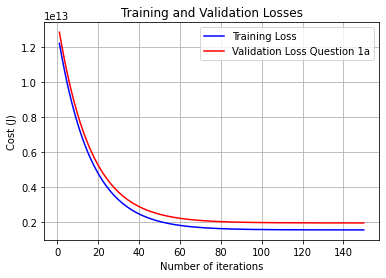

In [102]:
#plot the training and validation loss:
plt.plot(range(1, iterations + 1),cost_historyQatrain, color='blue')
plt.plot(range(1, iterations + 1),cost_historyQatest, color='red')
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Training and Validation Losses')
plt.legend(['Training Loss', 'Validation Loss Question 1a'])

plt.savefig('/Users/Dillon/Desktop/Senior Year/4105/Homework1/1a.png')

In [103]:
#Start of problem 1b

In [104]:
#for Question a we only want to look at these variables. 
Q1b_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
data_Newtrainb = data_train[Q1b_vars]
data_Newtestb = data_test[Q1b_vars]
data_Newtrainb.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
126,7160,3,1,1,1,0,1,0,0,2,1
363,3584,2,1,1,1,0,0,1,0,0,0
370,4280,2,1,1,1,0,0,0,1,2,0
31,7000,3,1,4,1,0,0,0,1,2,0
113,9620,3,1,1,1,0,1,0,0,2,1


In [105]:
#define the expl. variable values train
X_0_trainb = np.ones((mTrain, 1)) 
X_1_trainb = data_Newtrainb.values[:, 0].reshape((mTrain, 1)) # get input values from first column
X_2_trainb = data_Newtrainb.values[:, 1].reshape((mTrain, 1)) # get output values from second column
X_3_trainb = data_Newtrainb.values[:, 2].reshape((mTrain, 1)) # get output values from third column
X_4_trainb = data_Newtrainb.values[:, 3].reshape((mTrain, 1))
X_5_trainb = data_Newtrainb.values[:, 4].reshape((mTrain, 1))
X_6_trainb = data_Newtrainb.values[:, 5].reshape((mTrain, 1))
X_7_trainb = data_Newtrainb.values[:, 6].reshape((mTrain, 1))
X_8_trainb = data_Newtrainb.values[:, 7].reshape((mTrain, 1))
X_9_trainb = data_Newtrainb.values[:, 8].reshape((mTrain, 1))
X_10_trainb= data_Newtrainb.values[:, 9].reshape((mTrain, 1))
X_11_trainb= data_Newtrainb.values[:, 10].reshape((mTrain, 1))
#same output
y_train = data_train.values[:,0] # get output values from fourth column

#define the expl. variable values test
X_0_testb = np.ones((mTest, 1)) 
X_1_testb = data_Newtestb.values[:, 0].reshape((mTest, 1))  # get input values from first column
X_2_testb = data_Newtestb.values[:, 1].reshape((mTest, 1)) # get output values from second column
X_3_testb = data_Newtestb.values[:, 2].reshape((mTest, 1)) # get output values from third column
X_4_testb = data_Newtestb.values[:, 3].reshape((mTest, 1)) 
X_5_testb = data_Newtestb.values[:, 4].reshape((mTest, 1)) 
X_6_testb = data_Newtestb.values[:, 5].reshape((mTest, 1))  # get input values from first column
X_7_testb = data_Newtestb.values[:, 6].reshape((mTest, 1)) # get output values from second column
X_8_testb = data_Newtestb.values[:, 7].reshape((mTest, 1)) # get output values from third column
X_9_testb = data_Newtestb.values[:, 8].reshape((mTest, 1)) 
X_10_testb = data_Newtestb.values[:, 9].reshape((mTest, 1)) 
X_11_testb = data_Newtestb.values[:, 10].reshape((mTest, 1)) 
y_test = data_test.values[:,0] # get output values from fourth column


In [106]:
#now put the sets together:
X_trainb= np.hstack((X_0_trainb, X_1_trainb, X_2_trainb, X_3_trainb, X_4_trainb, X_5_trainb,X_6_trainb, X_7_trainb, X_8_trainb, X_9_trainb, X_10_trainb, X_11_trainb))
X_testb = np.hstack((X_0_testb, X_1_testb, X_2_testb, X_3_testb, X_4_testb, X_5_testb, X_5_testb, X_7_testb, X_8_testb, X_9_testb, X_10_testb, X_11_testb))



In [107]:
nb = 12;
thetaQb = np.zeros(nb)
iterations = 150
alpha = 0.000000001
#I want a slightly higher alpha and more iterations
thetaQb, cost_historyQbtrain, cost_historyQbtest = gd_Multi(X_trainb,X_testb, y_train, y_test, thetaQb, alpha, iterations, nb, mTrain, mTest)

In [108]:
print(thetaQb)

[1.96335563e-01 8.48046260e+02 6.31795935e-01 2.94422860e-01
 4.28337126e-01 1.73188946e-01 5.03931434e-02 9.40301683e-02
 1.48755058e-02 9.51914515e-02 1.56556239e-01 5.89531365e-02]


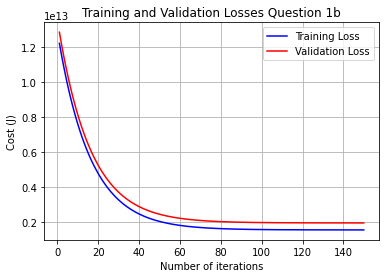

In [109]:
#plot the training and validation loss:
plt.plot(range(1, iterations + 1),cost_historyQbtrain, color='blue')
plt.plot(range(1, iterations + 1),cost_historyQbtest, color='red')
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Training and Validation Losses Question 1b')
plt.legend(['Training Loss', 'Validation Loss'])

plt.savefig('/Users/Dillon/Desktop/Senior Year/4105/Homework1/1b.png')

In [110]:
#Start of problem 2a

In [111]:
#First noralize the data using min max normalization
def Norm(X):

    #define the min and max values
    mini = min(X)
    maxi = max(X)

    X_Norm = (X - mini) / (maxi-mini)

    return X_Norm

In [112]:
#Normalize training
X_trainNorm2a = X_train
X_testNorm2a = X_test
for i in range(n-1):
    X_trainNorm2a[:, i+1] = Norm(X_train[:,i+1])
    X_testNorm2a[:, i+1] = Norm(X_test[:,i+1])

#Normalize output:
y_trainNorm2a = Norm(y_train)  
y_testNorm2a = Norm(y_test)   

In [113]:
#Now run the gradient descent on the nomalized data.
n2a = 6
thetaQ2a = np.zeros(n)
iterations2a = 1700
alpha2a = 0.01
#I want a slightly higher alpha and more iterations
thetaQ2a, cost_historyQ2atrain, cost_historyQ2atest = gd_Multi(X_trainNorm2a,X_testNorm2a, y_trainNorm2a, y_testNorm2a, thetaQ2a, alpha2a, iterations2a, n2a, mTrain, mTest)

In [114]:
print(thetaQ2a)

[0.12332029 0.17869128 0.10928612 0.14708283 0.1422205  0.14003001]


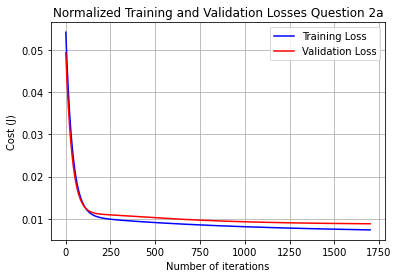

In [115]:
#plot the training and validation loss:
plt.plot(range(1, iterations2a + 1),cost_historyQ2atrain, color='blue')
plt.plot(range(1, iterations2a + 1),cost_historyQ2atest, color='red')
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Normalized Training and Validation Losses Question 2a')
plt.legend(['Training Loss', 'Validation Loss'])

plt.savefig('/Users/Dillon/Desktop/Senior Year/4105/Homework1/2a_Norm.png')

In [116]:
#Question 2 a for the standardization

In [117]:
def Stand(X):
    
#     size = len(X)
#     total = sum(X)
    mean = np.average(X)
    
    std = np.std(X)
    
    X_Stand = (X - mean) / std


    return X_Stand

In [118]:
#std training
X_trainstd2a = X_train
X_teststd2a = X_test
for i in range(n-1):
    X_trainstd2a[:, i+1] = Norm(X_train[:,i+1])
    X_teststd2a[:, i+1] = Norm(X_test[:,i+1])

#Standardize output:
y_trainstd2a = Norm(y_train)  
y_teststd2a = Norm(y_test)  

In [119]:
#Now run GD
n2astd = 6
thetaQ2astd = np.zeros(n)
iterations2astd = 2000
alpha2astd = 0.01
#I want a slightly higher alpha and more iterations
thetaQ2astd, cost_historyQ2astdtrain, cost_historyQ2astdtest = gd_Multi(X_trainstd2a,X_teststd2a, y_trainstd2a, y_teststd2a, thetaQ2astd, alpha2astd, iterations2astd, n2astd, mTrain, mTest)

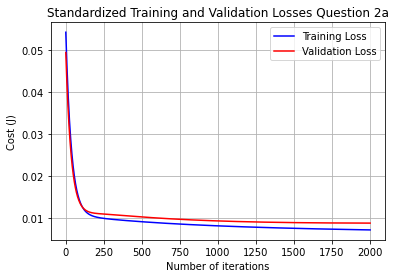

In [120]:
#plot the training and validation loss:
plt.plot(range(1, iterations2astd + 1),cost_historyQ2astdtrain, color='blue')
plt.plot(range(1, iterations2astd + 1),cost_historyQ2astdtest, color='red')
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Standardized Training and Validation Losses Question 2a')
plt.legend(['Training Loss', 'Validation Loss'])
plt.savefig('/Users/Dillon/Desktop/Senior Year/4105/Homework1/2a_Std.png')

In [121]:
#Start of Question 2b

In [122]:
#Normalize training
X_trainNorm2b = X_trainb
X_testNorm2b = X_testb
for i in range(n-1):
    X_trainNorm2b[:, i+1] = Norm(X_trainb[:,i+1])
    X_testNorm2b[:, i+1] = Norm(X_testb[:,i+1])

#Normalize output:
y_trainNorm2b = Norm(y_train)  
y_testNorm2b = Norm(y_test) 

In [123]:
n2b = 12
thetaQ2b = np.zeros(n2b)
iterations2b = 1300
alpha2b = 0.01
#I want a slightly higher alpha and more iterations
thetaQ2b, cost_historyQ2btrain, cost_historyQ2btest = gd_Multi(X_trainNorm2b,X_testNorm2b, y_trainNorm2b, y_testNorm2b, thetaQ2b, alpha2b, iterations2b, n2b, mTrain, mTest)

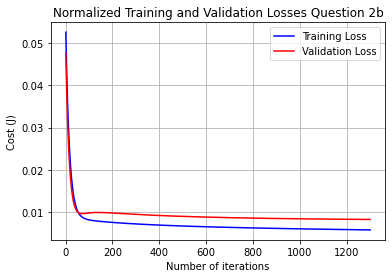

In [124]:
#plot the training and validation loss:
plt.plot(range(1, iterations2b + 1),cost_historyQ2btrain, color='blue')
plt.plot(range(1, iterations2b + 1),cost_historyQ2btest, color='red')
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Normalized Training and Validation Losses Question 2b')
plt.legend(['Training Loss', 'Validation Loss'])
plt.savefig('/Users/Dillon/Desktop/Senior Year/4105/Homework1/2b_Norm.png')

In [125]:
#Question 2b for the standardization

In [126]:
#Ntd training
X_trainstd2b = X_trainb
X_teststd2b = X_testb
for i in range(n-1):
    X_trainstd2b[:, i+1] = Norm(X_trainb[:,i+1])
    X_teststd2b[:, i+1] = Norm(X_testb[:,i+1])

#Normalize output:
y_trainstd2b = Norm(y_train)  
y_teststd2b = Norm(y_test)  

In [127]:
#Now run GD
n2bstd = 12
thetaQ2bstd = np.zeros(n2bstd)
iterations2bstd = 1500
alpha2bstd = 0.004
#I want a slightly higher alpha and more iterations
thetaQ2bstd, cost_historyQ2bstdtrain, cost_historyQ2bstdtest = gd_Multi(X_trainstd2b,X_teststd2b, y_trainstd2b, y_teststd2b, thetaQ2bstd, alpha2bstd, iterations2bstd, n2bstd, mTrain, mTest)

In [145]:
print(cost_historyQ3bstdtrain)

[0.05256271 0.04989549 0.04738993 ... 0.0055669  0.00556637 0.00556584]


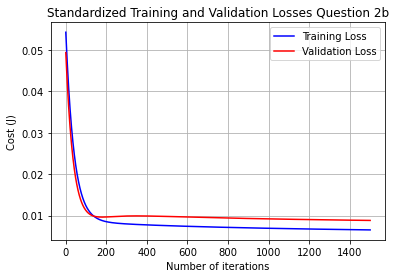

In [128]:
#plot the training and validation loss:
plt.plot(range(1, iterations2bstd + 1),cost_historyQ2bstdtrain, color='blue')
plt.plot(range(1, iterations2bstd + 1),cost_historyQ2bstdtest, color='red')
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Standardized Training and Validation Losses Question 2b')
plt.legend(['Training Loss', 'Validation Loss'])
plt.savefig('/Users/Dillon/Desktop/Senior Year/4105/Homework1/2b_STD.png')

In [129]:
#Start of Question 3

In [130]:
#write the GD function to include parameter penaties:

def gd_pp(X_train,X_test, y_train, y_test, theta, alpha, iterations, n, mTrain, mTest, lamb):
# n is the number of columns in the theta (how many variables + 1) 
 """
 Compute cost for linear regression.
 Input Parameters
 ----------------
 X : 2D array where each row represent the training example and each column represent
 m= number of training examples
 n= number of features (including X_0 column of ones)
 y : 1D array of labels/target value for each traing example. dimension(m x 1)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)
 alpha : Learning rate. Scalar value
 iterations: No of iterations. Scalar value.
 Output Parameters
 -----------------
 theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
 cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
 """
 cost_history_Train = np.zeros(iterations)
 cost_history_Test = np.zeros(iterations)
 sum_delta = np.zeros(n)
 

 for i in range(iterations):
    h = X_train.dot(theta) ##gives a m x 1 array
    errors = np.subtract(h, y_train) ## also m x 1
    
    """ 
    Here is the main difference in my code vs what was provided.
    I run this for loop n times and multiple the thetas one at a time
    This should work for a data set of any amount of explanatory variables. 
    """
    for j in range(n):             
        sum_delta[j] = (alpha / mTrain) * X_train[:,j].transpose().dot(errors); ##1 x 1 array
        if j == 0:  
            theta[j] = theta[j] - sum_delta[j];   
        if j != 0: 
            theta[j] = theta[j]*(1- lamb*alpha/mTrain)- sum_delta[j];# Here is where the penalties come in.
                                                                     # I don't want penalties to impact theta_0        
    #call the loss functions
             #Training loss
    cost_history_Train[i] = loss(X_train, y_train, theta, mTrain)
             # Validation loss
    cost_history_Test[i]  = loss(X_test, y_test, theta, mTest)
 return theta, cost_history_Train, cost_history_Test


In [131]:
#Question 3a Normalization

In [132]:
n3a = 6
thetaQ3a = np.zeros(n)
iterations3a = 1700
alpha3a = 0.01
lambda3a = 0.9
thetaQ3a, cost_historyQ3atrain, cost_historyQ3atest = gd_pp(X_trainNorm2a,X_testNorm2a, y_trainNorm2a, y_testNorm2a, thetaQ3a, alpha3a, iterations3a, n3a, mTrain, mTest,lambda3a)

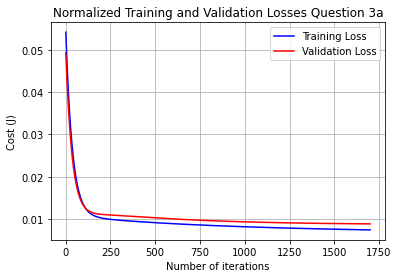

In [133]:
#plot the training and validation loss:
plt.plot(range(1, iterations3a + 1),cost_historyQ3atrain, color='blue')
plt.plot(range(1, iterations3a + 1),cost_historyQ3atest, color='red')

plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Normalized Training and Validation Losses Question 3a')
plt.legend(['Training Loss', 'Validation Loss'])
plt.savefig('/Users/Dillon/Desktop/Senior Year/4105/Homework1/3a_Norm.png')

In [134]:
#Question 3a Standardization

In [135]:
thetaQ3astd = np.zeros(n)
iterations3astd = 1700
alpha3astd = 0.01
lambda3astd = 0.99
thetaQ3astd, cost_historyQ3astdtrain, cost_historyQ3astdtest = gd_pp(X_trainstd2a,X_teststd2a, y_trainstd2a, y_teststd2a, thetaQ3astd, alpha3astd, iterations3astd, n3a, mTrain, mTest,lambda3astd)

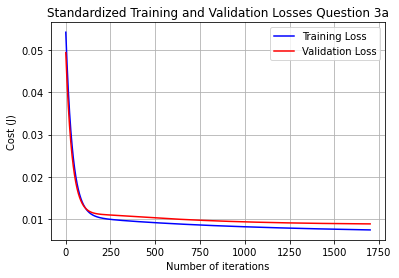

In [136]:
#plot the training and validation loss:
plt.plot(range(1, iterations3astd + 1),cost_historyQ3astdtrain, color='blue')
plt.plot(range(1, iterations3astd + 1),cost_historyQ3astdtest, color='red')

plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Standardized Training and Validation Losses Question 3a')
plt.legend(['Training Loss', 'Validation Loss'])
plt.savefig('/Users/Dillon/Desktop/Senior Year/4105/Homework1/3a_STD.png')

In [137]:
#Question 3b Normilization

In [138]:
n3b = 12
thetaQ3b = np.zeros(n2b)
iterations3b = 1300
alpha3b = 0.01
lambda3b = 1
thetaQ3b, cost_historyQ3btrain, cost_historyQ3btest = gd_pp(X_trainNorm2b,X_testNorm2b, y_trainNorm2b, y_testNorm2b, thetaQ3b, alpha3b, iterations3b, n3b, mTrain, mTest, lambda3b)

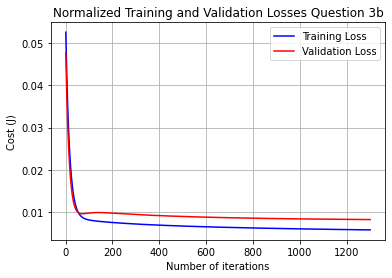

In [143]:
#plot the training and validation loss:
plt.plot(range(1, iterations3b + 1),cost_historyQ3btrain, color='blue')
plt.plot(range(1, iterations3b + 1),cost_historyQ3btest, color='red')
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Normalized Training and Validation Losses Question 3b')
plt.legend(['Training Loss', 'Validation Loss'])
plt.savefig('/Users/Dillon/Desktop/Senior Year/4105/Homework1/3b_Norm.png')

In [140]:
#Question 3b Standardization

In [141]:
thetaQ3bstd = np.zeros(n2b)
iterations3bstd = 1700
alpha3bstd = 0.01
lambda3bstd = 0.99
thetaQ3bstd, cost_historyQ3bstdtrain, cost_historyQ3bstdtest = gd_pp(X_trainstd2b,X_teststd2b, y_trainstd2b, y_teststd2b, thetaQ3bstd, alpha3bstd, iterations3bstd, n2b, mTrain, mTest,lambda3bstd)

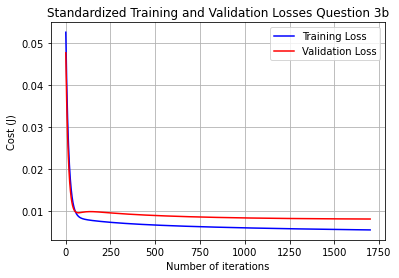

In [142]:
#plot the training and validation loss:
plt.plot(range(1, iterations3bstd + 1),cost_historyQ3bstdtrain, color='blue')
plt.plot(range(1, iterations3bstd + 1),cost_historyQ3bstdtest, color='red')
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Standardized Training and Validation Losses Question 3b')
plt.legend(['Training Loss', 'Validation Loss'])

plt.savefig('/Users/Dillon/Desktop/Senior Year/4105/Homework1/3b_STD.png')